In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X :  (100, 2)
dimension de y :  (100, 1)


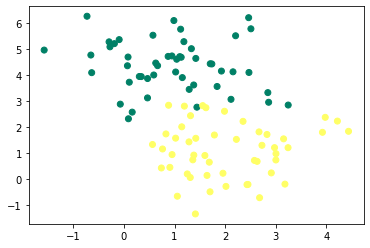

In [24]:

X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state= 0)
y = y.reshape((y.shape[0],1))

print("dimension de X : ", X.shape)
print("dimension de y : " , y.shape)

plt.scatter(X[:,0], X[:,1], c = y, cmap = "summer")
plt.show()

In [45]:
def init(X): #fonction d'initialisation des paramètres
  W = np.random.randn(X.shape[1],1) #W = vecteur de la taille du nombre de colonnes de X
  b = np.random.randn(1) #b = nombre réel
  return (W,b)

In [75]:
def model(X, W, b): #modèle d'apprentissage linéaire
  Z = X.dot(W)+b
  return 1/(1+np.exp(-Z))

A = model(X, W, b)
A.shape

(100, 1)

In [43]:
def Loss(A, y): #fonction coût
  return (-1/len(y))*(np.sum(y*np.log(A)+(1-y)*np.log(1-A)))

In [47]:
def gradients(X, y , A): #gradients du model
  dW = 1/len(y) * np.dot(X.T, A-y)
  db = 1/len(y) * sum(A-y)
  return (dW, db)

In [52]:
def gradient_descent(dW, db, W, b, learning_rate): # algorithme de descente de gradient
  W = W - learning_rate*dW
  b = b - learning_rate*db
  return (W,b)

In [76]:
def predict(X, W, b): #pour tester le neurone artificiel
  A = model(X, W, b)
  return A>=0.5 

In [81]:
def artificial_neuron(X, y, learning_rate = 0.1, iter = 100): #neurone artifciel
  W, b = init(X) #initialisation des paramètres
  Log_loss = [] #erreurs du modèle

  for i in range(iter):
    A = model(X, W, b) #fonction d'activation
    dW, db = gradients(X, y, A) #calcul des gradients
    Log_loss.append(Loss(A,y)) #stockage des erreurs
    W, b = gradient_descent(dW, db, W, b, learning_rate) #descente de gradient, optimisation de la fonction coût sur les paramètres W et b
 
  y1 = predict(X, W, b)
  print(accuracy_score(y, y1))

  plt.plot(Log_loss)
  plt.show()

  return (W, b)

0.92


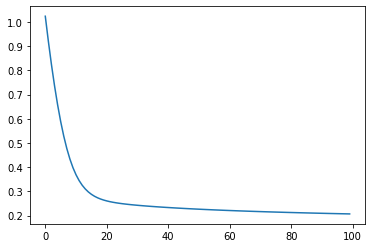

In [82]:
W, b = artificial_neuron(X, y, 0.1, 100)